In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Load the data
a  = """bilinguisme,
Emotion prise de,
Emotion prise de,
Emotion prise de,
sommeil,
musique mémoire,
sommeil,
sommeil,
sommeil,
sommeil,
sommeil,
bilinguisme,
sommeil,
musique mémoire,
bilinguisme,
musique mémoire,
bilinguisme,
Emotion prise de,
Meditation"""

a = a.split(',')
a = [x.strip() for x in a]
a = pd.DataFrame(a, columns=['category'])
a.value_counts()

category        
sommeil             7
Emotion prise de    4
bilinguisme         4
musique mémoire     3
Meditation          1
dtype: int64

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.20036909, 0.43221838, 0.64559785, 1.        ],
       [0.27916955, 0.39777009, 0.58531334, 1.        ],
       [0.36078431, 0.3620915 , 0.52287582, 1.        ],
       [0.43958478, 0.32764321, 0.46259131, 1.        ],
       [0.52119954, 0.29196463, 0.40015379, 1.        ],
       [0.6       , 0.25751634, 0.33986928, 1.        ],
       [0.68161476, 0.22183775, 0.27743176, 1.        ],
       [0.76041522, 0.18738947, 0.21714725, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ]])

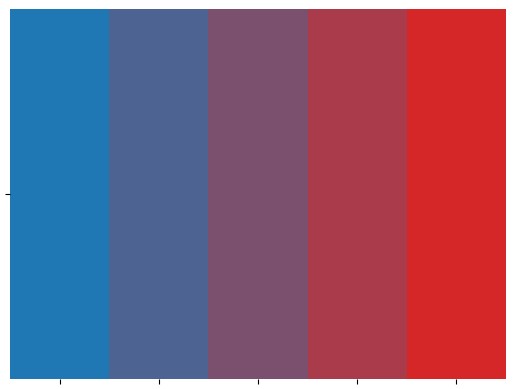

In [3]:
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import matplotlib.cm as cm


c = sns.color_palette().as_hex()
cm = (c[0], c[3], c[4])
c2 = sns.color_palette(f'blend:{c[0]},{c[3]}', as_cmap=True)
h = sns.heatmap([list(range(5))], cmap=c2, cbar=False)

sns.set(rc={'figure.figsize':(7,1)})
h.set(xticklabels=[], yticklabels=[])

norm = mcolors.Normalize()
data_normed = norm(list(range(10)))
data_rgba= c2(data_normed)
data_rgba

Text(0, 0.5, 'likelihood')

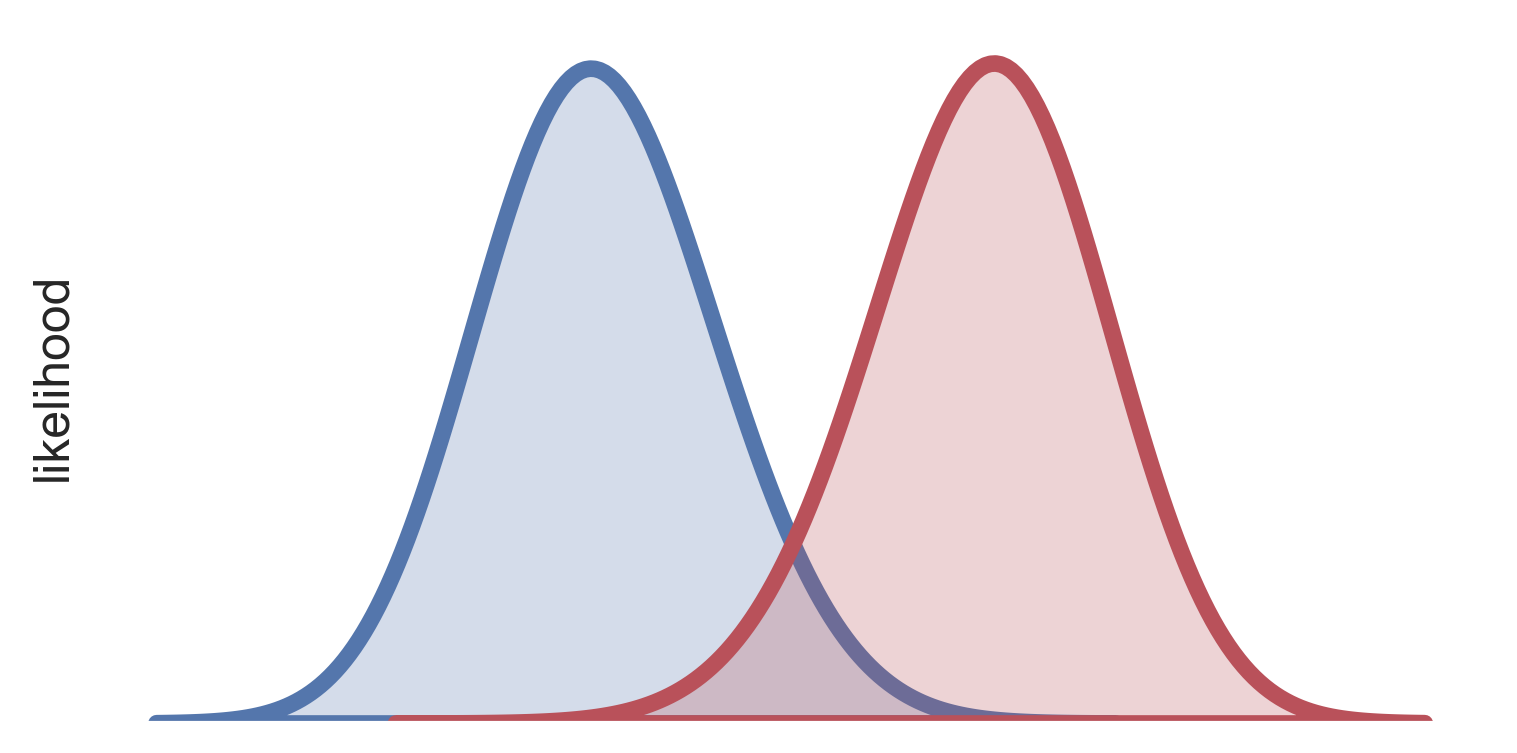

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
a = np.random.beta(5, 15, 1000)
b = np.random.(15, 5, 1000)

from matplotlib import colors as mcolors

c = ["#5476AC", "#B9515A"] #"#85d691", green
c = list(map(lambda x: mcolors.to_rgba(x), c))
x = pd.DataFrame({'option A': a, 'option B': b})

sns.set(rc={'figure.figsize':(6,3), 'figure.dpi': 300, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

g1 = sns.kdeplot(x["option A"], bw_adjust=5, fill=True, color=c[0], lw=4) 
#plot loglikelihood function
# sns.lineplot(x=x['option A'], y=np.log(x['option B']), color=c[0], lw=4, label='loglikelihood')
g2 = sns.kdeplot(x["option B"], bw_adjust=5, fill=True, color=c[1], label='option B', lw=4)
# g2.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
g1.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

sns.despine(left=True)

# plt.xlabel('$\sigma$', fontdict={'size': 25})
plt.xlabel('')
plt.ylabel('likelihood')
# plt.savefig('grade.svg', format='svg', dpi=300)

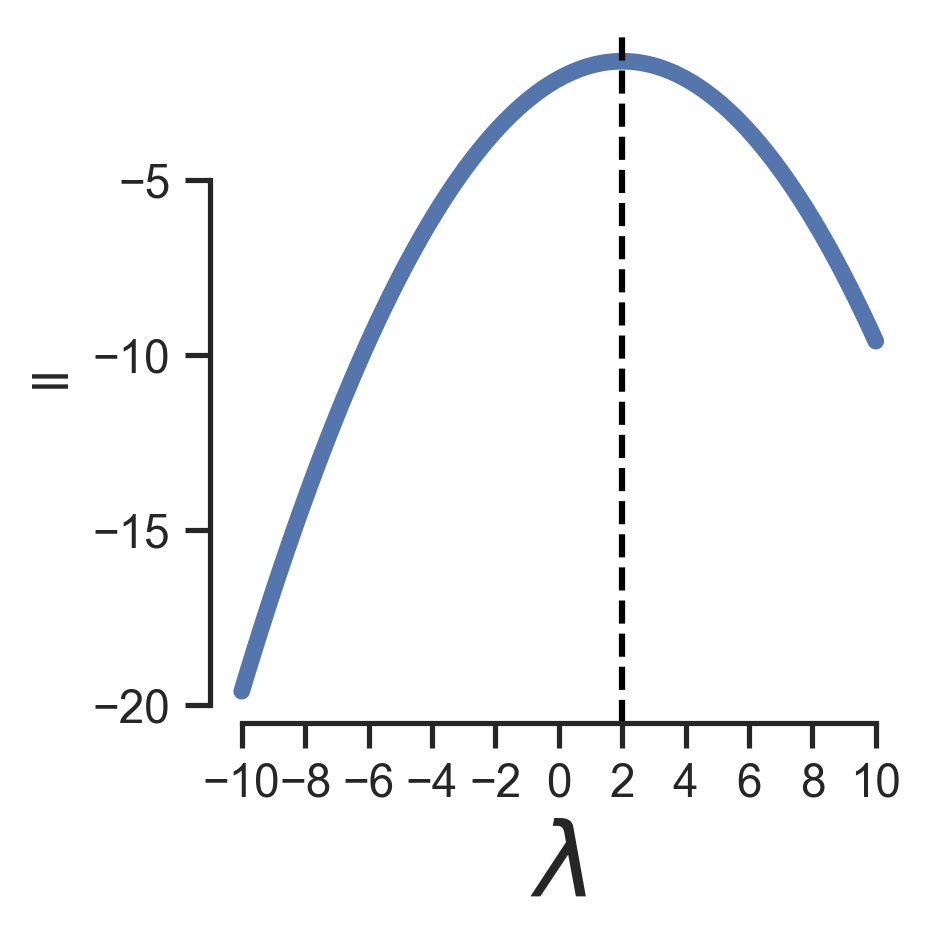

In [26]:
import scipy.stats as stats
sigma = 2
mu=0
y = []
sns.set_style('ticks')
for x in np.linspace(-10, 10, 100):
    y.append(np.log(stats.norm.pdf(x, sigma, sigma)))

plt.plot(np.linspace(-10, 10, 100), y, color=c[0], lw=4)
plt.xlabel('$\lambda$', fontdict={'size': 25})
# set ylabel with font computer modern (latex)
plt.ylabel('ll')
# set y line at sigma value
plt.axvline(x=sigma, color='black', linestyle='--')
# set a range of x ticks such that it includes sigma
plt.xticks(np.arange(-10, 11, 2))

sns.despine(trim=True)



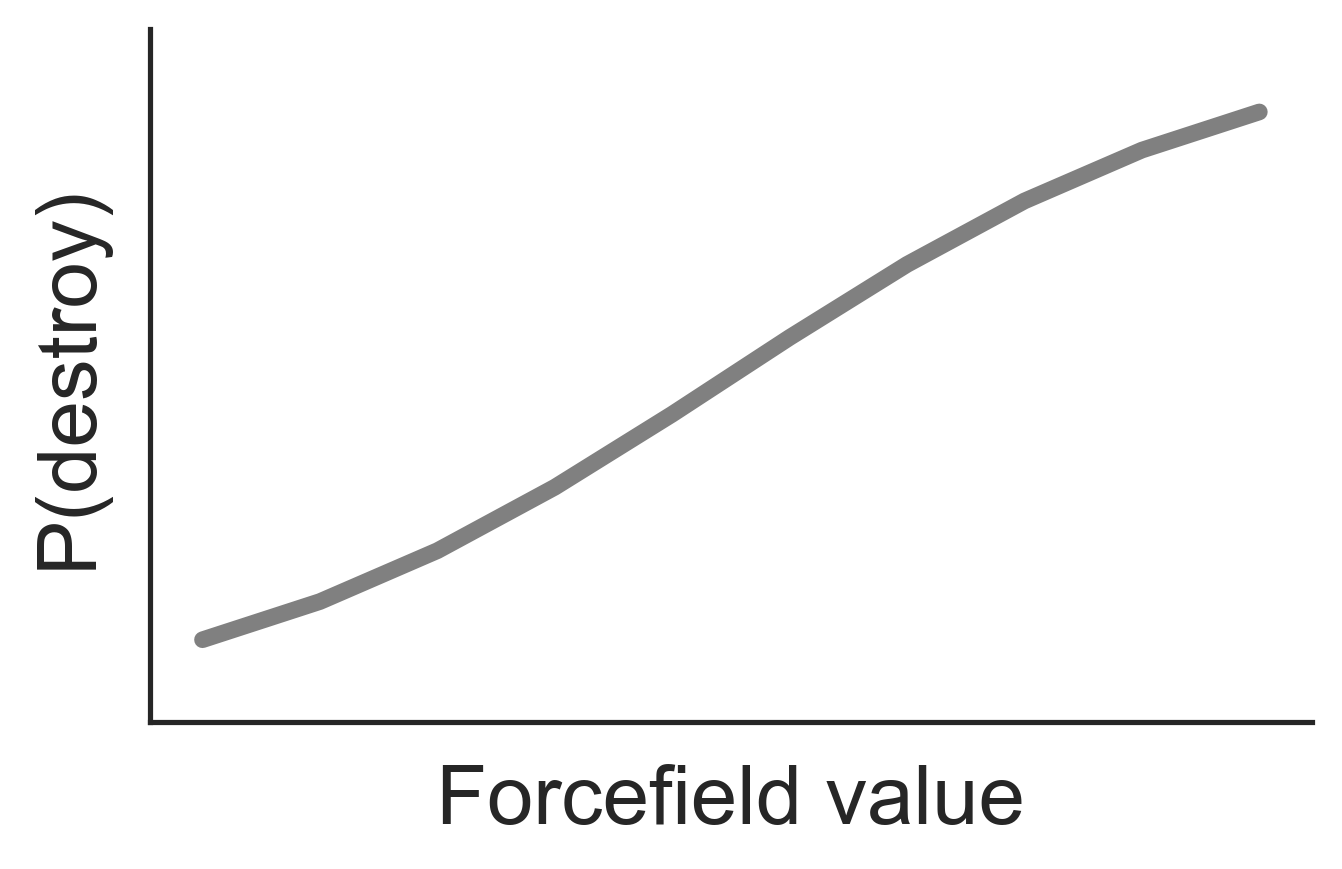

In [34]:

import scipy.stats as stats


sns.set(rc={'figure.figsize':(5,3), 'figure.dpi': 300, 'axes.facecolor': (0, 0, 0, 0), 'figure.facecolor': (0, 0, 0, 0)})
sns.set_style('ticks')
x = np.linspace(-1, 1, 10)
y = 1/(1+np.exp(-2*x))

sns.lineplot(x=x, y=y, color='gray', lw=4)

plt.xlabel('Forcefield value', fontdict={'size': 20})
# set ylabel with font computer modern (latex)
plt.ylabel('P(destroy)', fontdict={'size': 20})
plt.ylim(0, 1)

# remove x and y ticks values
plt.yticks([], [])
plt.xticks([], [])

# set fontsize 
# remove x and y ticks values 
# plt.yticks([], [])
# set y line at sigma value
# plt.axvline(x=sigma, color='black', linestyle='--')
# set a range of x ticks such that it includes sigma
# plt.xticks(np.arange(-10, 11, 2))

sns.despine(trim=True)
# save figure with transparent background
plt.savefig('test.png', dpi=300, transparent=True)


([<matplotlib.axis.XTick at 0x7f7a56c954f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

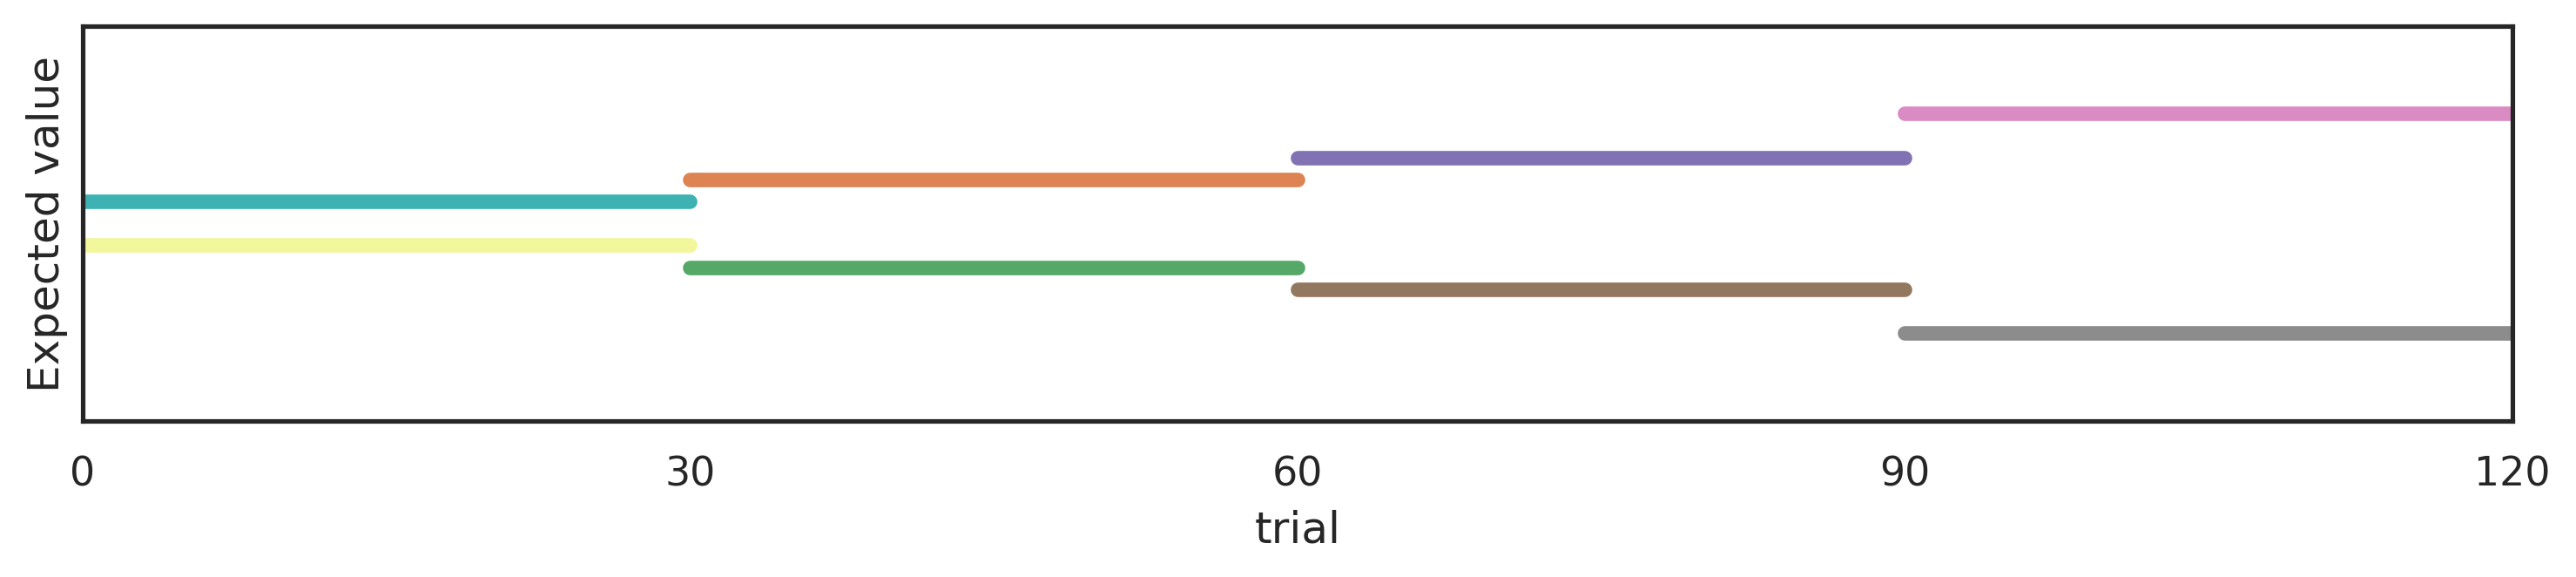

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

c = ["#3EB2B2", "#F2F79C"]
c = list(map(lambda x: mcolors.to_rgba(x), c))

sns.set(rc={'figure.figsize':(12,2), 'figure.dpi': 300})
sns.set_style('white')
x = [[0, 30], [30, 60], [60,  90], [90, 120]]
y1 =  [[4 ,4], [4.5, 4.5], [5, 5], [6, 6]]
y2 =  [[3 ,3], [2.5, 2.5], [2, 2], [1, 1]]
options = ['option A', 'option B']
cc = (f"C{i}" for i in (1, 2, 4, 5, 6, 7))
for i in range(len(x)):
    if i == 0:
        sns.lineplot(x=x[i], y=y1[i], color=c[0], lw=4) 
        sns.lineplot(x=x[i], y=y2[i], color=c[1], lw=4)
        continue
    sns.lineplot(x=x[i], y=y1[i], color=next(cc), lw=4) 
    sns.lineplot(x=x[i], y=y2[i], color=next(cc), lw=4)

# plt.fill_between(x[0], y1[0], y2[0], color=c[0], alpha=0.4)
plt.xlim([0, 120])
plt.ylim([-1, 8])
plt.tick_params(labelleft=False, bottom=False, left=False)
plt.ylabel('Expected value')
plt.xlabel('trial')
plt.xticks([0, 30, 60, 90, 120])
# g2.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
# g1.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

# sns.despine(left=True)

# plt.xlabel('P(destroy force field)', fontdict={'size': 25})